<a href="https://colab.research.google.com/github/xwllzqk/2020nCov_individual_archives/blob/master/k_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path_to_train = '/content/drive/My Drive/ML2020/KNN/zip.train'
path_to_test = '/content/drive/My Drive/ML2020/KNN/zip.test'
training_data = np.array(pd.read_csv(path_to_train, sep=' ', header=None))
test_data = np.array(pd.read_csv(path_to_test, sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [ ]:
def show_numbers(X):
    num_samples = 90
    indices = np.random.choice(range(len(X)), num_samples)
    sample_digits = X[indices]

    fig = plt.figure(figsize=(20, 6))

    for i in range(num_samples):
        ax = plt.subplot(6, 15, i + 1)
        img =(1-sample_digits[i].reshape((16, 16)))/2*255
        plt.imshow(img, cmap='gray')
        plt.axis('off')


In [ ]:
class KNearestNeighbors():
    
    def euclidean_distance(self, x_1, x_2):
      return np.sum((x_1-x_2)**2, axis = 1)

    def match(self, X, y):  #match the plots and its label (number)
      self.X = X
      self.y = y

    def guessNr(self, sample, k):
      distance = self.euclidean_distance(self.X, sample)  #calculate the distance between the sample and each item from the trained data
      index = np.argpartition(distance, k)[:k]  #pick the index of first smallest k distances
      nrList = self.y[index]  #the possible number of the sample in a list
      count = np.bincount(nrList.astype(int), minlength = 10)  #count how often each possible number is
      guessResult = np.argmax(count)  #pick the most often (first) number as result
      return guessResult

    def accuracy(self, X_test, y_test, k):
      correct = 0
      wrong = 0
      incorrect = []
      for i in range(X_test.shape[0]):
        if self.guessNr(X_test[i], k) == int(y_test[i]):
          correct += 1
        else:
          wrong += 1
          incorrect.append(i)
      result = correct/(correct+wrong)
      return ([result] + incorrect)



In [ ]:
kNN = KNearestNeighbors()
kNN.match(X_train, y_train)
k1 = kNN.accuracy(X_test, y_test, 1)
k2 = kNN.accuracy(X_test, y_test, 2)
k3 = kNN.accuracy(X_test, y_test, 3)
k4 = kNN.accuracy(X_test, y_test, 4)
k5 = kNN.accuracy(X_test, y_test, 5)
k6 = kNN.accuracy(X_test, y_test, 6)
k7 = kNN.accuracy(X_test, y_test, 7)
k8 = kNN.accuracy(X_test, y_test, 8)
k9 = kNN.accuracy(X_test, y_test, 9)
k10 = kNN.accuracy(X_test, y_test, 10)
print('k = 1, accuracy =', k1[0])
print('k = 2, accuracy =', k2[0])
print('k = 3, accuracy =', k3[0])
print('k = 4, accuracy =', k4[0])
print('k = 5, accuracy =', k5[0])
print('k = 6, accuracy =', k6[0])
print('k = 7, accuracy =', k7[0])
print('k = 8, accuracy =', k8[0])
print('k = 9, accuracy =', k9[0])
print('k = 10, accuracy =', k10[0])


k = 1, accuracy = 0.9436970602889886
k = 2, accuracy = 0.9412057797708022
k = 3, accuracy = 0.9446935724962631
k = 4, accuracy = 0.9431988041853513
k = 5, accuracy = 0.9446935724962631
k = 6, accuracy = 0.9387144992526159
k = 7, accuracy = 0.9417040358744395
k = 8, accuracy = 0.9407075236671649
k = 9, accuracy = 0.9372197309417041
k = 10, accuracy = 0.9357249626307922


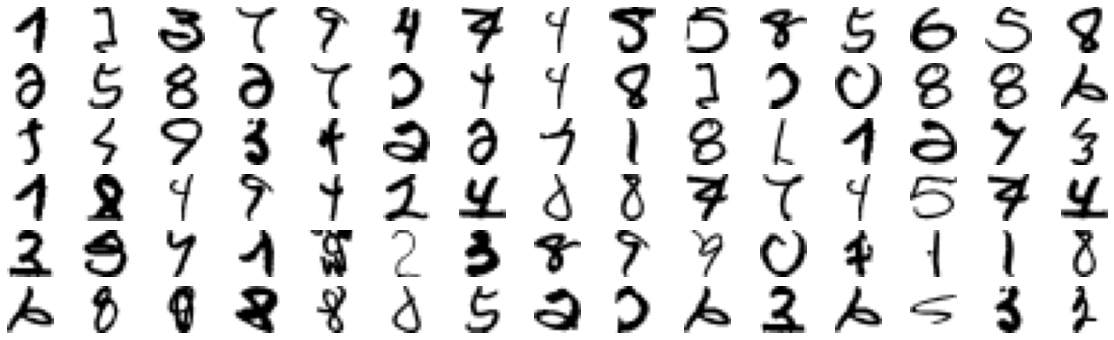

In [ ]:
show_numbers(X_test[k1[1:]])